## GroupBy: 분할, 적용, 결합

각 열에 대한 여러 일반적인 집계를 계산하고 결과를 반환하는 describe() 메서드가 있다.
간단한 집계는 데이터세트의 전반적인 특성을 알려주지만, 때에 따라서는 어떤 행이나 인덱스를 기준으로 조건부로 집계할 경우가 있다.
이때 GroupBy 연산을 활용한다.

### 분할, 적용, 결합

- 분할 : 지정된 키값을 기준으로 데이터프레임을 나누고 분류
- 적용 : 개별 그룹 내에서 일반적으로 집계, 변환, 필터링 같은 함수를 계산
- 결합 : 연산의 결과를 결과 배열에 병합

In [17]:
df = pd.DataFrame({'key' : ['A','B','C','A','B','C'],
                  'data' : range(6)},
                 columns = ['key','data'])

In [18]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


데이터프레임의 groupby()메서드에 원하는 키 열의 이름을 전달해 가장 기본적인 분할, 적용, 결합 연결을 계산

In [19]:
df.groupby('key')

In [20]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### 집계, 필터, 변환, 적용

sum(), median()  등을 활용하여 데이터프레임의 데이터를 집계하였지만 aggregate() 메서드를 활용하면 더 유연하게 집계 할 수 있다.

In [24]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key' : ['A','B','C','A','B','C'],
                  'data1' : range(6),
                  'data2' : rng.randint(0,10,6)},
                 columns = ['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [25]:
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

열 이름을 해당 열에 적용될 연산에 매핑하는 딕셔너리를 전달하여 같은 동작을 수행할 수 있다.

In [29]:
df.groupby('key').aggregate({'data1':'min', 'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### 필터링

필터링 연산을 사용하면 그룹 속성을 기준으로 데이터를 걸러낼 수 있다.

In [30]:
def filter_func(x):
    return x['data2'].std() > 4

In [31]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [34]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [33]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### 변환

데이터의 내용을 재 계산하여 데이터가 바뀐 버전의 새로운 데이터프레임을 만들 수 있다.

In [36]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [38]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [39]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


함수를 활용하고 싶다면 apply() 메서드를 활용한다.

In [51]:
def norm_by_data2(x):
    x['data1'] = x['data2'].sum()
    return x

In [52]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,8,5
1,B,7,0
2,C,12,3
3,A,8,3
4,B,7,7
5,C,12,9


quiz) 위의 예제에서 groupby를 활용하여 key를 기준으로한 data2의 평균을 표시하세요.

In [61]:
def norm_by_data3(x):
    x['평균'] = x['data2'].mean()
    return x

In [62]:
df.groupby('key').apply(norm_by_data3)

,key,data1,data2,평균
0,A,0,5,4.0
1,B,1,0,3.5
2,C,2,3,6.0
3,A,3,3,4.0
4,B,4,7,3.5
5,C,5,9,6.0


### 분할 기 지정하기

하나의 열 이름을 기준으로 DataFrame을 분할 하였지만 리스트, 딕셔너리, 리스트를 활용하여 그룹을 만들수 있다.

#### 리스트

In [83]:
L = [0,1,0,1,2,0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [84]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### 딕셔너리

In [85]:
df2 = df.set_index('key')

In [86]:
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [87]:
mapping = {'A':'Banana','B':'Apple','C':'Apple'}

In [88]:
df2.groupby(mapping).sum()

,data1,data2
Apple,12,19
Banana,3,8


#### 인덱스

In [ ]:
인덱스의 그룹을 출력하는 파이썬함수를 활용할 수 있다.

In [116]:
df2.groupby(df2.index).mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [117]:
df2.index

Index(['A', 'B', 'C', 'A', 'B', 'C'], dtype='object', name='key')

#### 멀티 인덱스

앞에서 다룬 방식을 리스트로 다중인덱스로 구성할 수 있다.

In [123]:
df2.groupby([df2.index, mapping]).mean()

,,data1,data2
key,,,
A,Banana,1.5,4.0
B,Apple,2.5,3.5
C,Apple,3.5,6.0


#### 예시

In [124]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [125]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [101]:
decade = planets['year']
decade

0       2006
1       2008
2       2011
3       2007
4       2009
5       2008
6       2002
7       1996
8       2008
9       2010
10      2010
11      2009
12      2008
13      1996
14      2001
15      2009
16      1995
17      1996
18      2004
19      2002
20      2011
21      2007
22      2009
23      2009
24      2009
25      1996
26      2012
27      2008
28      2013
29      2005
        ... 
1005    2012
1006    2012
1007    2012
1008    2012
1009    2012
1010    2012
1011    2012
1012    2012
1013    2012
1014    2012
1015    2012
1016    2013
1017    2012
1018    2012
1019    2012
1020    2012
1021    2013
1022    2012
1023    2012
1024    2012
1025    2012
1026    2014
1027    2011
1028    2012
1029    2012
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64

In [103]:
decade = planets['year'] // 10
decade

0       200
1       200
2       201
3       200
4       200
5       200
6       200
7       199
8       200
9       201
10      201
11      200
12      200
13      199
14      200
15      200
16      199
17      199
18      200
19      200
20      201
21      200
22      200
23      200
24      200
25      199
26      201
27      200
28      201
29      200
       ... 
1005    201
1006    201
1007    201
1008    201
1009    201
1010    201
1011    201
1012    201
1013    201
1014    201
1015    201
1016    201
1017    201
1018    201
1019    201
1020    201
1021    201
1022    201
1023    201
1024    201
1025    201
1026    201
1027    201
1028    201
1029    201
1030    200
1031    200
1032    200
1033    200
1034    200
Name: year, Length: 1035, dtype: int64

In [104]:
decade = (planets['year'] // 10) * 10
decade

0       2000
1       2000
2       2010
3       2000
4       2000
5       2000
6       2000
7       1990
8       2000
9       2010
10      2010
11      2000
12      2000
13      1990
14      2000
15      2000
16      1990
17      1990
18      2000
19      2000
20      2010
21      2000
22      2000
23      2000
24      2000
25      1990
26      2010
27      2000
28      2010
29      2000
        ... 
1005    2010
1006    2010
1007    2010
1008    2010
1009    2010
1010    2010
1011    2010
1012    2010
1013    2010
1014    2010
1015    2010
1016    2010
1017    2010
1018    2010
1019    2010
1020    2010
1021    2010
1022    2010
1023    2010
1024    2010
1025    2010
1026    2010
1027    2010
1028    2010
1029    2010
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [126]:
decade = decade.astype(str) + 's'

In [127]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 피벗테이블

피벗테이블(pivot table)은 입력값으로 간단한 열 단위의 데이터를 취하고 그 데이터에 대한 다차원 요약을 제공하는 테이블을 구성하는 방법이다.

In [129]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


성별에 따른 평균 생존율을 구한다면

In [140]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [138]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 피벗 테이블 구문

In [141]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 다단계 피벗 테이블

피벗 테이블의 그룹핑은 다단계로 여러 옵션을 통해 지정할 수 있다

In [143]:
age = pd.cut(titanic['age'],[0,18,80])

In [146]:
titanic.pivot_table('survived',index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [156]:
fare = pd.qcut(titanic['fare'],2,labels=['저가','고가'])

In [157]:
pd.value_counts(fare)

저가    447
고가    444
Name: fare, dtype: int64

In [158]:
titanic.pivot_table('survived', index=['sex',age],columns=[fare, 'class'])

fare               저가                            고가                    
class           First    Second     Third     First    Second     Third
sex    age                                                             
female (0, 18]    NaN  1.000000  0.714286  0.909091  1.000000  0.318182
       (18, 80]   NaN  0.880000  0.444444  0.972973  0.914286  0.391304
male   (0, 18]    NaN  0.000000  0.260870  0.800000  0.818182  0.178571
       (18, 80]   0.0  0.098039  0.125000  0.391304  0.030303  0.192308

### 기타 피벗 테이블 옵션

피벗테이블의 옵션에서 aggfunc 키워드는 어떤 유형의 집계를 적용할지 제어한다(기본값 : 평균).
평균이외에 'count', 'min', 'max' 등을 활용가능하고 딕셔너리를 활용하여 열마다 다르게 집계 할 수도 있다.

In [162]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

margins 키워드를 통해 그룹별 총합을 계산할 수 있다.

In [164]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True,
                   margins_name="합계")

class,First,Second,Third,합계
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
합계,0.629630,0.472826,0.242363,0.383838


### 예제

In [165]:
births = pd.read_csv('births.csv')

In [167]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [168]:
births['decade'] = 10 * (births['year'] // 10)

In [169]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [170]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [171]:
import matplotlib.pyplot as plt

In [172]:
sns.set()

Text(0,0.5,'total births per year')

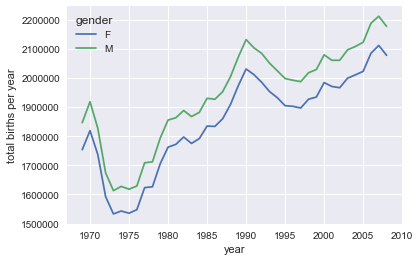

In [176]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0,0.5,'total births per year')

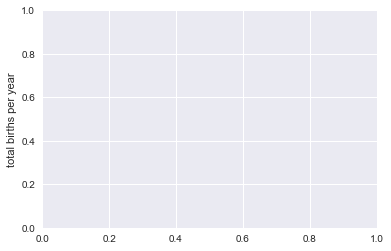